In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pl
import sklearn.datasets as datasets
%matplotlib inline

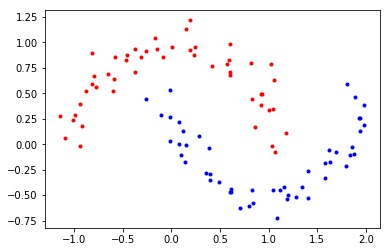

In [10]:
N = 100
X, Y = datasets.make_moons(N, noise=0.1)
I0 = (Y == 0)
I1 = (Y == 1)
pl.plot(X[I0, 0], X[I0, 1], '.r', X[I1, 0], X[I1, 1], '.b');

In [94]:
tf.reset_default_graph()

Input = tf.placeholder(tf.float32, (None, 2))
Ref = tf.placeholder(tf.float32, (None, 1))

In [95]:
L1 = tf.layers.dense(inputs=Input, units=100, activation=tf.nn.relu, name="L1")
L2 = tf.layers.dense(inputs=L1, units=100, activation=None, name="L2")
L3 = tf.layers.dense(inputs=L2, units=1, activation=None, name="L3")
Output = L3

In [96]:
E = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Ref, logits=Output))
Prediction = tf.nn.sigmoid(Output)

In [97]:
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(E)
s = tf.Session()
s.run(tf.global_variables_initializer())
feed = {Input: X, Ref: Y.reshape(-1, 1)}
print "Initial err: %.2f" % s.run(E, feed)

Initial err: 0.64


## Training

In [107]:
for epoch in range(1000):
    err, _ = s.run([E, optimizer], feed)
    if epoch % 100 == 0:
        print "[%d]: %.2f" % (epoch, err)
print "Done"

[0]: 0.03
[100]: 0.03
[200]: 0.03
[300]: 0.03
[400]: 0.03
[500]: 0.02
[600]: 0.02
[700]: 0.02
[800]: 0.02
[900]: 0.02
Done


## Plotting the classification boundary

In [108]:
m = 50
x_axis = np.linspace(np.min(X[:, 0]), np.max(X[:,0]), m)
y_axis = np.linspace(np.min(X[:, 1]), np.max(X[:,1]), m)
xx, yy = np.meshgrid(x_axis, y_axis)
x_input = np.asarray([xx.reshape(-1), yy.reshape(-1)]).T

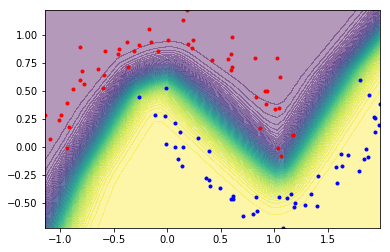

In [109]:
z = s.run(Prediction, {Input: x_input})
pl.plot(X[I0, 0], X[I0, 1], '.r', X[I1, 0], X[I1, 1], '.b');
pl.contourf(xx, yy, z.reshape(m, m), 100, alpha=0.4);